In [460]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [461]:
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
qualifying = pd.read_csv('qualifying.csv')
driver_standings = pd.read_csv('driver_standings.csv')
constructor_standings = pd.read_csv('constructor_standings.csv')
weather = pd.read_csv('weather.csv')

In [462]:
races.columns

Index(['season', 'round', 'circuit_id', 'lat', 'long', 'country', 'date',
       'url'],
      dtype='object')

In [463]:
print(results.shape)
results.columns

(24167, 13)


Index(['season', 'round', 'circuit_id', 'driver', 'date_of_birth',
       'nationality', 'constructor', 'grid', 'time', 'status', 'points',
       'podium', 'url'],
      dtype='object')

In [464]:
print(qualifying.shape)
qualifying.columns

(14559, 6)


Index(['grid_position', 'driver_name', 'car', 'qualifying_time', 'season',
       'round'],
      dtype='object')

In [465]:

driver_standings.columns

Index(['season', 'round', 'driver', 'driver_points_after_race',
       'driver_wins_after_race', 'driver_standings_pos_after_race',
       'driver_points', 'driver_wins', 'driver_standings_pos'],
      dtype='object')

In [466]:

constructor_standings.columns

Index(['season', 'round', 'constructor', 'constructor_points_after_race',
       'constructor_wins_after_race', 'constructor_standings_pos_after_race',
       'constructor_points', 'constructor_wins', 'constructor_standings_pos'],
      dtype='object')

In [467]:
weather.columns

Index(['season', 'round', 'circuit_id', 'weather', 'weather_warm',
       'weather_cold', 'weather_dry', 'weather_wet', 'weather_cloudy'],
      dtype='object')

## Exploratory Data analysis

In [468]:
print(races.shape)
races.head()

(1018, 8)


,season,round,circuit_id,lat,long,country,date,url
0,1950,1,silverstone,52.0786,-1.01694,UK,1950-05-13,http://en.wikipedia.org/wiki/1950_British_Gran...
1,1950,2,monaco,43.7347,7.42056,Monaco,1950-05-21,http://en.wikipedia.org/wiki/1950_Monaco_Grand...
2,1950,3,indianapolis,39.7950,-86.23470,USA,1950-05-30,http://en.wikipedia.org/wiki/1950_Indianapolis...
3,1950,4,bremgarten,46.9589,7.40194,Switzerland,1950-06-04,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
4,1950,5,spa,50.4372,5.97139,Belgium,1950-06-18,http://en.wikipedia.org/wiki/1950_Belgian_Gran...


In [469]:
print(results.shape)
results.head()

(24167, 13)


,season,round,circuit_id,driver,date_of_birth,nationality,constructor,grid,time,status,points,podium,url
0,1950,1,silverstone,farina,1906-10-30,Italian,alfa,1,8003600.0,Finished,9.0,1,http://en.wikipedia.org/wiki/1950_British_Gran...
1,1950,1,silverstone,fagioli,1898-06-09,Italian,alfa,2,8006200.0,Finished,6.0,2,http://en.wikipedia.org/wiki/1950_British_Gran...
2,1950,1,silverstone,reg_parnell,1911-07-02,British,alfa,4,8055600.0,Finished,4.0,3,http://en.wikipedia.org/wiki/1950_British_Gran...
3,1950,1,silverstone,cabantous,1904-10-08,French,lago,6,NaN,+2 Laps,3.0,4,http://en.wikipedia.org/wiki/1950_British_Gran...
4,1950,1,silverstone,rosier,1905-11-05,French,lago,9,NaN,+2 Laps,2.0,5,http://en.wikipedia.org/wiki/1950_British_Gran...


In [470]:
print(qualifying.shape)
qualifying.rename(columns = {'grid_position': 'grid'}, inplace = True)
qualifying.head()

(14559, 6)


,grid,driver_name,car,qualifying_time,season,round
0,1,Keke Rosberg ROS,Williams Honda,1:34.526,1983,1
1,2,Alain Prost PRO,Renault,1:34.672,1983,1
2,3,Patrick Tambay TAM,Ferrari,1:34.758,1983,1
3,4,Nelson Piquet PIQ,Brabham BMW,1:35.114,1983,1
4,5,Derek Warwick WAR,Toleman Hart,1:35.206,1983,1


**Palaces and countries that held grand prix**

In [471]:
import folium
import pandas as pd

map = folium.Map(location=[48, 11], zoom_start=3)
for index, row in races.iterrows():
    folium.Marker([row['lat'], row['long']], popup=row['country']).add_to(map)

map

**Number of Races held each season since 1950**

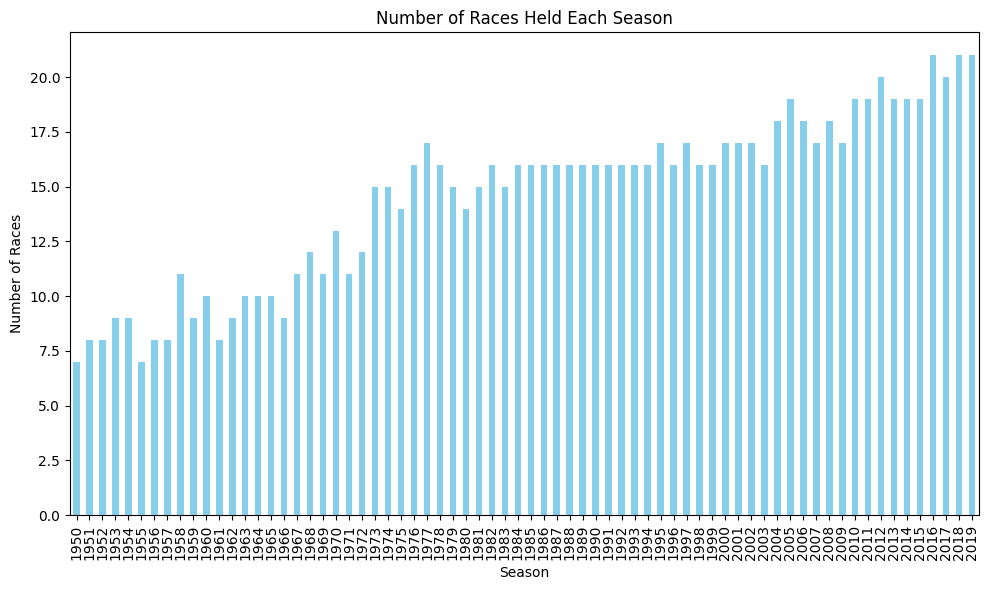

In [472]:
# Correcting the race counts calculation
race_counts = results.groupby('season')['round'].nunique()

# bar chart
plt.figure(figsize=(10, 6))
race_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Season')
plt.ylabel('Number of Races')
plt.title('Number of Races Held Each Season')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


In [473]:
driver_standings.drop(['driver_points_after_race', 'driver_wins_after_race', 'driver_standings_pos_after_race'] ,axis = 1, inplace = True)

print(driver_standings.shape)
driver_standings.head()

(26264, 6)


,season,round,driver,driver_points,driver_wins,driver_standings_pos
0,1950,1,farina,0.0,0.0,0.0
1,1950,1,fagioli,0.0,0.0,0.0
2,1950,1,reg_parnell,0.0,0.0,0.0
3,1950,1,cabantous,0.0,0.0,0.0
4,1950,1,rosier,0.0,0.0,0.0


In [474]:
constructor_standings.drop(['constructor_points_after_race', 'constructor_wins_after_race','constructor_standings_pos_after_race' ],axis = 1, inplace = True)

print(constructor_standings.shape)
constructor_standings.head()

(12316, 6)


,season,round,constructor,constructor_points,constructor_wins,constructor_standings_pos
0,1958,1,cooper,0.0,0.0,0.0
1,1958,1,ferrari,0.0,0.0,0.0
2,1958,1,maserati,0.0,0.0,0.0
3,1958,2,cooper,8.0,1.0,1.0
4,1958,2,ferrari,6.0,0.0,2.0


In [475]:
constructor_standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     12316 non-null  int64  
 1   round                      12316 non-null  int64  
 2   constructor                12316 non-null  object 
 3   constructor_points         12316 non-null  float64
 4   constructor_wins           12316 non-null  float64
 5   constructor_standings_pos  12316 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 577.4+ KB


In [476]:
print(weather.shape)
weather.head()

(1018, 9)


,season,round,circuit_id,weather,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy
0,1950,1,silverstone,"Sunny, Mild, Dry",0,0,1,0,0
1,1950,2,monaco,Soleggiato,1,0,0,0,0
2,1950,3,indianapolis,Rainy,0,0,0,1,0
3,1950,4,bremgarten,"Warm, dry and sunny",1,0,1,0,0
4,1950,5,spa,"Warm, dry and sunny",1,0,1,0,0


**frequency of weather condition (warm, cold, dry, wet, cloudy) occurs across all seasons**

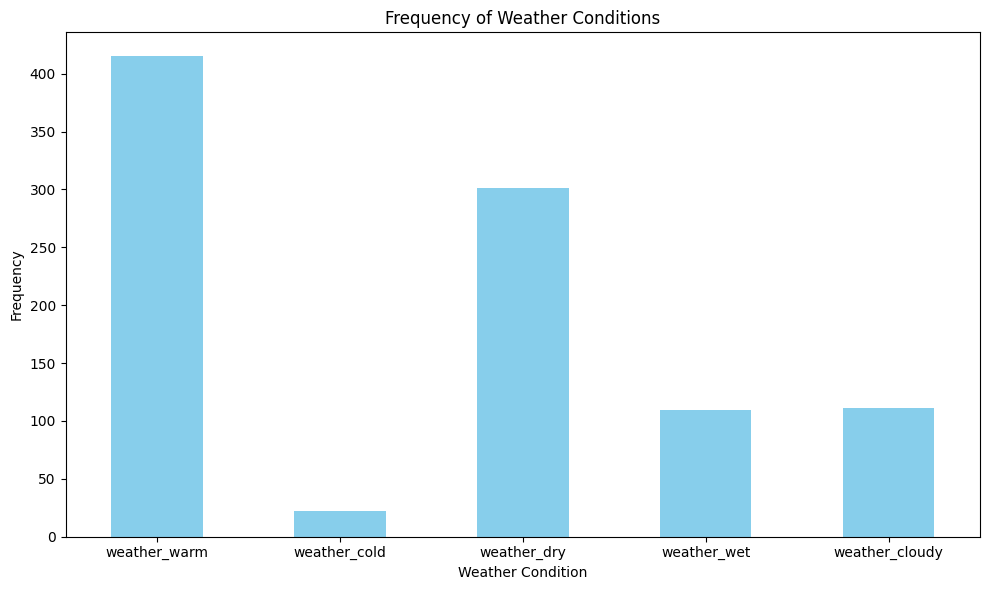

In [477]:
# Calculate the frequency of each weather condition across all seasons or rounds
weather_freq = weather[['weather_warm', 'weather_cold', 'weather_dry', 'weather_wet', 'weather_cloudy']].sum()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
weather_freq.plot(kind='bar', color='skyblue')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.title('Frequency of Weather Conditions')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**Most popular Circuits over the years**

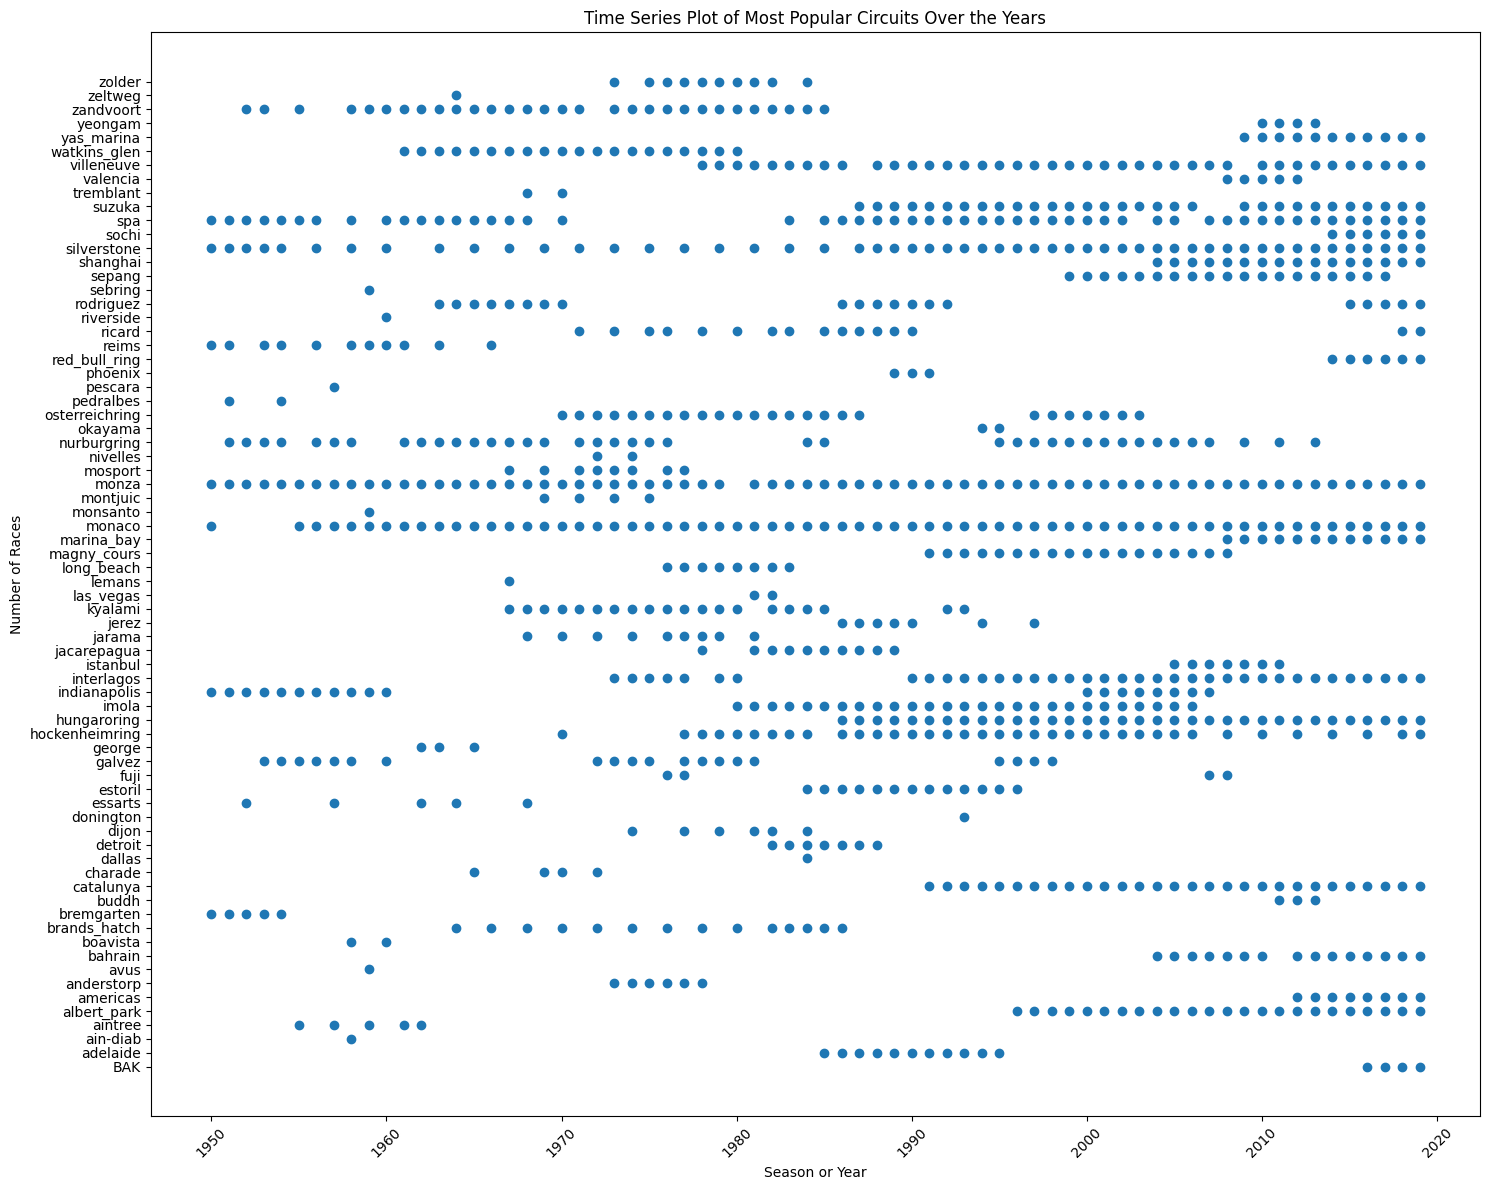

In [478]:

weather_sorted = weather.sort_values(by='circuit_id', ascending=True)

plt.figure(figsize=(15, 12))
plt.scatter(weather_sorted['season'], weather_sorted['circuit_id'], marker='o')
plt.xlabel('Season or Year')
plt.ylabel('Number of Races')
plt.title('Time Series Plot of Most Popular Circuits Over the Years')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**TOP 5 most famous and least famous circuits**

In [479]:
popular_circuits = weather.groupby('circuit_id').size().reset_index(name='num_races')
popular_circuits_sorted = popular_circuits.sort_values(by='num_races', ascending=False)
top_5_popular_circuits = popular_circuits_sorted.head(5)

print("Top 5 Popular Circuits:")
print(top_5_popular_circuits)


Top 5 Popular Circuits:
     circuit_id  num_races
42        monza         69
39       monaco         66
59  silverstone         53
61          spa         52
45  nurburgring         40


In [480]:
popular_circuits = weather.groupby('circuit_id').size().reset_index(name='num_races')
popular_circuits_sorted = popular_circuits.sort_values(by='num_races', ascending=True)
top_5_least_popular_circuits = popular_circuits_sorted.head(5)

print("Top 5 least Popular Circuits:")
print(top_5_least_popular_circuits)

Top 5 least Popular Circuits:
   circuit_id  num_races
35     lemans          1
18  donington          1
2    ain-diab          1
70    zeltweg          1
56    sebring          1


**Races held on each circuit**

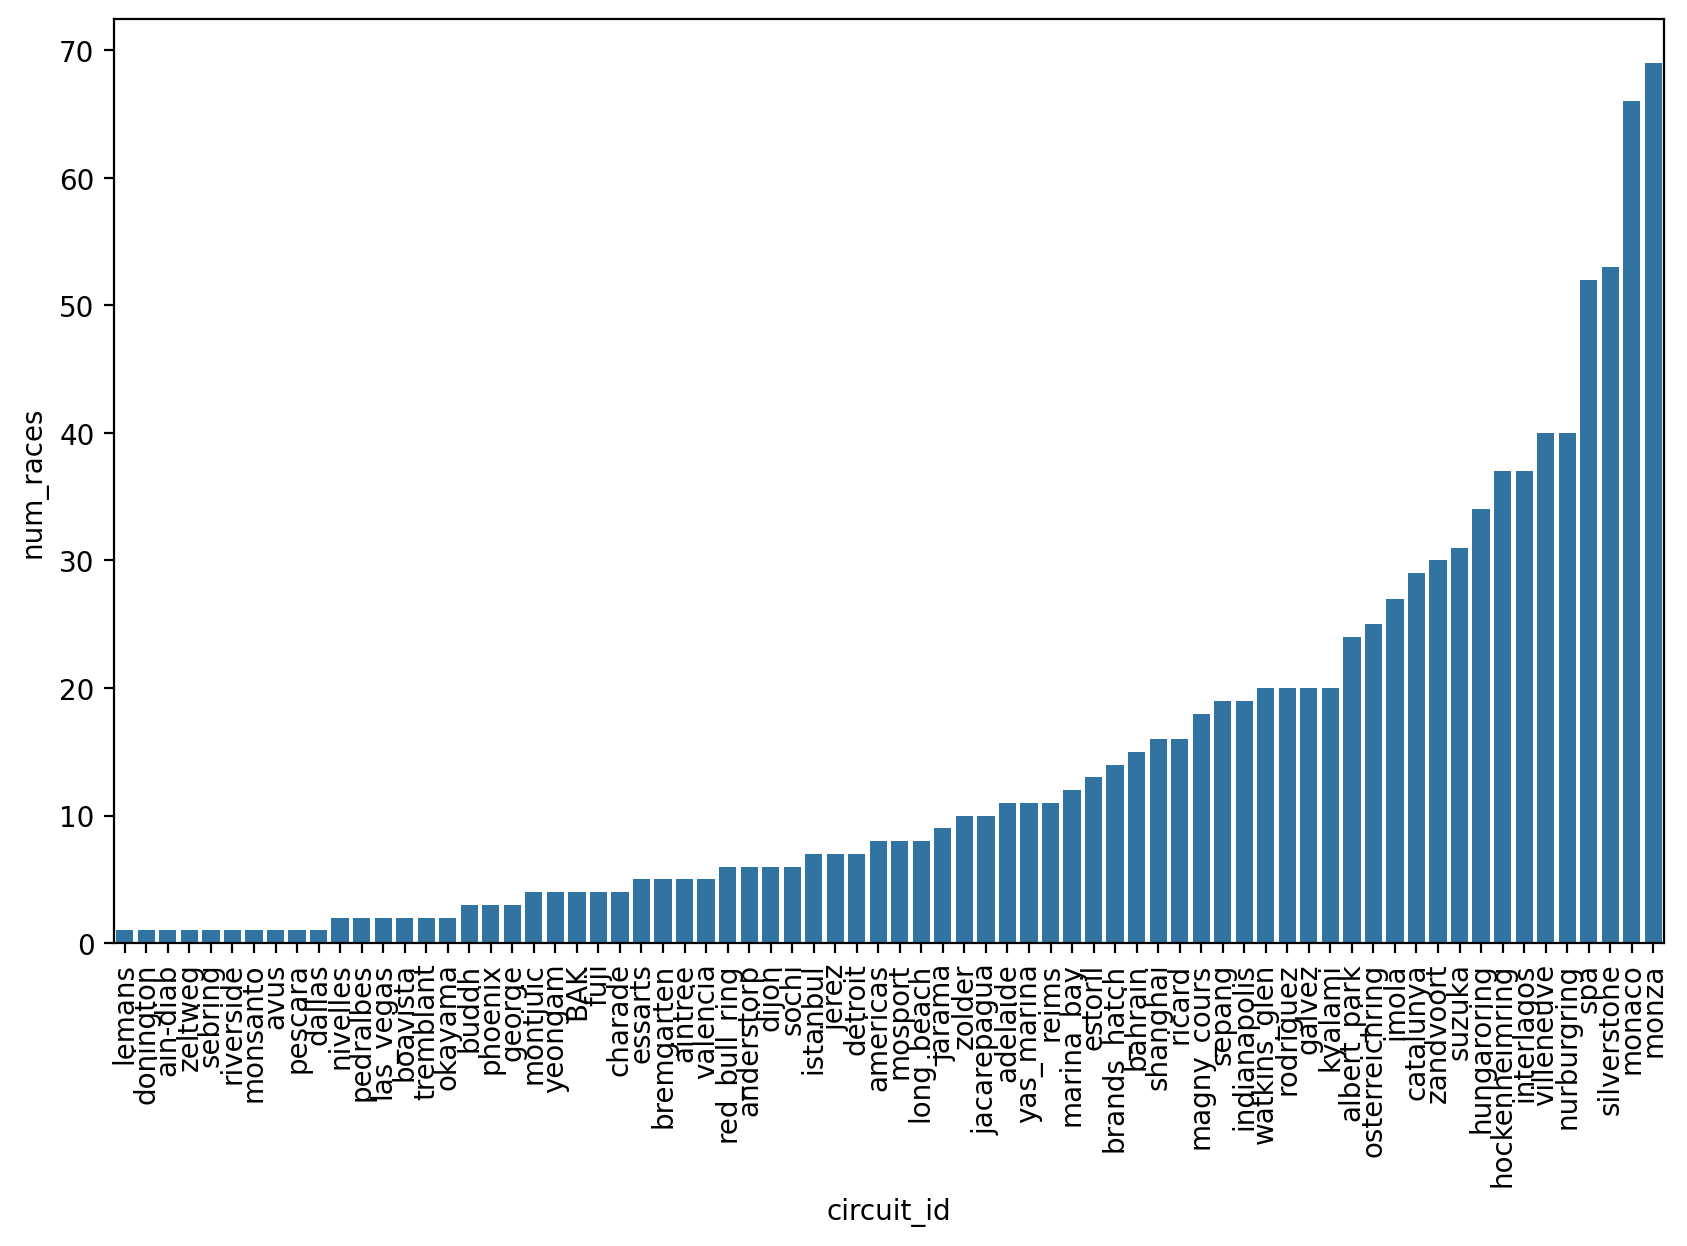

In [481]:
plt.figure(figsize=(10,6), dpi=200)
sns.barplot(data=popular_circuits_sorted, x="circuit_id", y="num_races")
plt.xticks(rotation=90);

**Driver Points**

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


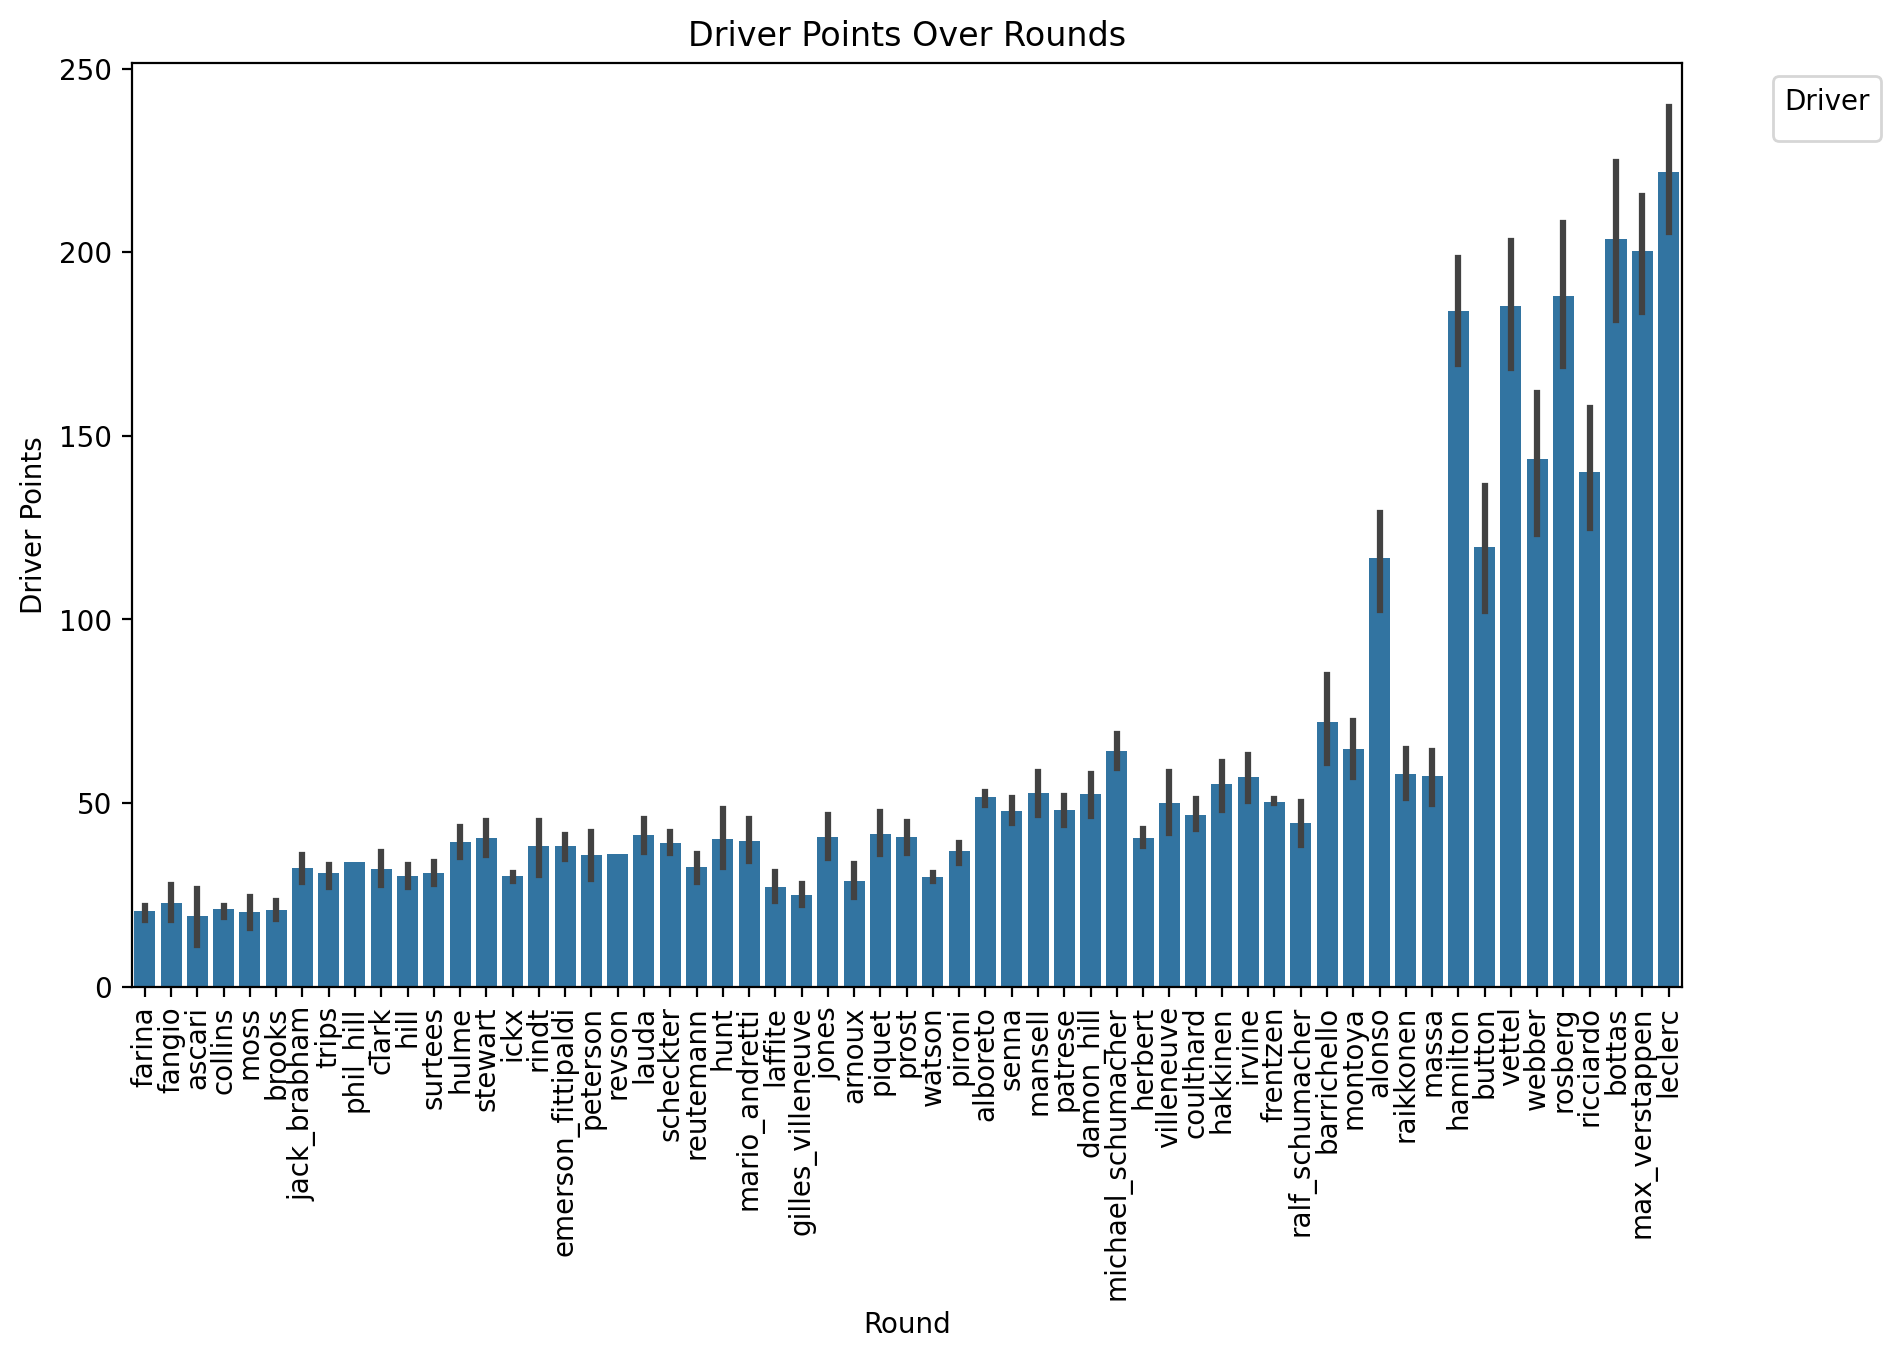

In [482]:
plt.figure(figsize=(10, 6), dpi=200)
sns.barplot(y='driver_points', x='driver', data=driver_standings[driver_standings['driver_wins'] > 1])
plt.xlabel('Round')
plt.ylabel('Driver Points')
plt.title('Driver Points Over Rounds')
plt.legend(title='Driver', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=90)
plt.show()

In [483]:
races

,season,round,circuit_id,lat,long,country,date,url
0,1950,1,silverstone,52.0786,-1.01694,UK,1950-05-13,http://en.wikipedia.org/wiki/1950_British_Gran...
1,1950,2,monaco,43.7347,7.42056,Monaco,1950-05-21,http://en.wikipedia.org/wiki/1950_Monaco_Grand...
2,1950,3,indianapolis,39.7950,-86.23470,USA,1950-05-30,http://en.wikipedia.org/wiki/1950_Indianapolis...
3,1950,4,bremgarten,46.9589,7.40194,Switzerland,1950-06-04,http://en.wikipedia.org/wiki/1950_Swiss_Grand_...
4,1950,5,spa,50.4372,5.97139,Belgium,1950-06-18,http://en.wikipedia.org/wiki/1950_Belgian_Gran...
...,...,...,...,...,...,...,...,...
1013,2019,17,suzuka,34.8431,136.54100,Japan,2019-10-13,https://en.wikipedia.org/wiki/2019_Japanese_Gr...
1014,2019,18,rodriguez,19.4042,-99.09070,Mexico,2019-10-27,https://en.wikipedia.org/wiki/2019_Mexican_Gra...
1015,2019,19,americas,30.1328,-97.64110,USA,2019-11-03,https://en.wikipedia.org/wiki/2019_United_Stat...
1016,2019,20,interlagos,-23.7036,-46.69970,Brazil,2019-11-17,https://en.wikipedia.org/wiki/2019_Brazilian_G...


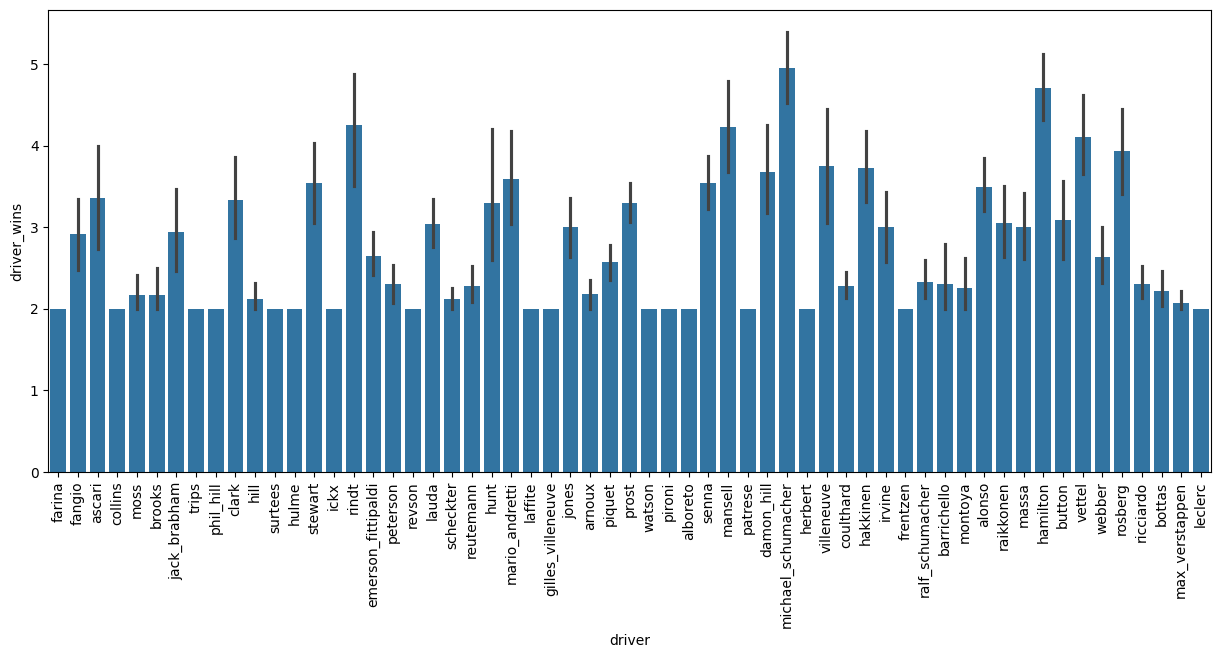

In [485]:
plt.figure(figsize=(15, 6)) 
sns.barplot(data=driver_standings[driver_standings['driver_wins'] > 1], x="driver", y="driver_wins")
plt.xticks(rotation=90)
plt.show()

In [486]:
qualifying.head()

,grid,driver_name,car,qualifying_time,season,round
0,1,Keke Rosberg ROS,Williams Honda,1:34.526,1983,1
1,2,Alain Prost PRO,Renault,1:34.672,1983,1
2,3,Patrick Tambay TAM,Ferrari,1:34.758,1983,1
3,4,Nelson Piquet PIQ,Brabham BMW,1:35.114,1983,1
4,5,Derek Warwick WAR,Toleman Hart,1:35.206,1983,1


In [487]:
results.columns

Index(['season', 'round', 'circuit_id', 'driver', 'date_of_birth',
       'nationality', 'constructor', 'grid', 'time', 'status', 'points',
       'podium', 'url'],
      dtype='object')

In [488]:
df1 = pd.merge(races, weather, how='inner', on=['season', 'round', 'circuit_id']).drop(['lat', 'long','country','weather'], axis = 1)


In [489]:
df2 = pd.merge(df1, results, how='inner', on=['season', 'round', 'circuit_id', 'url']).drop(['url','points', 'status', 'time'], axis = 1)


In [490]:
df3 = pd.merge(df2, driver_standings, how='left', on=['season', 'round', 'driver']) 

In [491]:
df4 = pd.merge(df3, constructor_standings, how='left', on=['season', 'round', 'constructor']) #from 1958

In [492]:
final_df = pd.merge(df4, qualifying, how='inner', on=['season', 'round', 'grid']).drop(['driver_name', 'car'], axis = 1) #from 1983
print(final_df.columns)

Index(['season', 'round', 'circuit_id', 'date', 'weather_warm', 'weather_cold',
       'weather_dry', 'weather_wet', 'weather_cloudy', 'driver',
       'date_of_birth', 'nationality', 'constructor', 'grid', 'podium',
       'driver_points', 'driver_wins', 'driver_standings_pos',
       'constructor_points', 'constructor_wins', 'constructor_standings_pos',
       'qualifying_time'],
      dtype='object')


In [493]:
final_df.head()

,season,round,circuit_id,date,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,driver,...,constructor,grid,podium,driver_points,driver_wins,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,qualifying_time
0,1983,1,jacarepagua,1983-03-13,0,0,1,0,0,piquet,...,brabham,4,1,0.0,0.0,0.0,0.0,0.0,0.0,1:35.114
1,1983,1,jacarepagua,1983-03-13,0,0,1,0,0,lauda,...,mclaren,9,2,0.0,0.0,0.0,0.0,0.0,0.0,1:36.054
2,1983,1,jacarepagua,1983-03-13,0,0,1,0,0,laffite,...,williams,18,3,0.0,0.0,0.0,0.0,0.0,0.0,1:38.234
3,1983,1,jacarepagua,1983-03-13,0,0,1,0,0,tambay,...,ferrari,3,4,0.0,0.0,0.0,0.0,0.0,0.0,1:34.758
4,1983,1,jacarepagua,1983-03-13,0,0,1,0,0,surer,...,arrows,20,5,0.0,0.0,0.0,0.0,0.0,0.0,1:38.468


In [494]:
# calculating age of drivers

from dateutil.relativedelta import *

final_df['date'] = pd.to_datetime(final_df.date)
final_df['date_of_birth'] = pd.to_datetime(final_df.date_of_birth)
final_df['driver_age'] = final_df.apply(lambda x: relativedelta(x['date'], x['date_of_birth']).years, axis=1)
final_df.drop(['date', 'date_of_birth'], axis = 1, inplace = True)

In [495]:
# fill/drop nulls

for col in ['driver_points', 'driver_wins', 'driver_standings_pos', 'constructor_points', 
            'constructor_wins' , 'constructor_standings_pos']:
    final_df[col].fillna(0, inplace = True)
    final_df[col] = final_df[col].map(lambda x: int(x))
    
final_df.dropna(inplace = True )

C:\Users\ramsh\AppData\Local\Temp\ipykernel_23000\1859737165.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  final_df[col].fillna(0, inplace = True)


In [496]:
# convert to boolean

for col in ['weather_warm', 'weather_cold','weather_dry', 'weather_wet', 'weather_cloudy']:
    final_df[col] = final_df[col].map(lambda x: bool(x))


In [497]:
# calculate difference in qualifying times

final_df['qualifying_time'] = final_df.qualifying_time.map(lambda x: 0 if str(x) == '00.000' 
                             else(float(str(x).split(':')[1]) + (60 * float(str(x).split(':')[0])) if x != 0 else 0))
final_df = final_df[final_df['qualifying_time'] != 0]
final_df.sort_values(['season', 'round', 'grid'], inplace = True)
final_df['qualifying_time_diff'] = final_df.groupby(['season', 'round']).qualifying_time.diff()
final_df['qualifying_time'] = final_df.groupby(['season', 'round']).qualifying_time_diff.cumsum().fillna(0)
final_df.drop('qualifying_time_diff', axis = 1, inplace = True)


In [498]:
final_df.columns

Index(['season', 'round', 'circuit_id', 'weather_warm', 'weather_cold',
       'weather_dry', 'weather_wet', 'weather_cloudy', 'driver', 'nationality',
       'constructor', 'grid', 'podium', 'driver_points', 'driver_wins',
       'driver_standings_pos', 'constructor_points', 'constructor_wins',
       'constructor_standings_pos', 'qualifying_time', 'driver_age'],
      dtype='object')

In [499]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14273 entries, 14 to 14520
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   season                     14273 non-null  int64  
 1   round                      14273 non-null  int64  
 2   circuit_id                 14273 non-null  object 
 3   weather_warm               14273 non-null  bool   
 4   weather_cold               14273 non-null  bool   
 5   weather_dry                14273 non-null  bool   
 6   weather_wet                14273 non-null  bool   
 7   weather_cloudy             14273 non-null  bool   
 8   driver                     14273 non-null  object 
 9   nationality                14273 non-null  object 
 10  constructor                14273 non-null  object 
 11  grid                       14273 non-null  int64  
 12  podium                     14273 non-null  int64  
 13  driver_points              14273 non-null  int64  

In [500]:
final_df.corr(numeric_only=True)

,season,round,weather_warm,weather_cold,weather_dry,weather_wet,weather_cloudy,grid,podium,driver_points,driver_wins,driver_standings_pos,constructor_points,constructor_wins,constructor_standings_pos,qualifying_time,driver_age
season,1.000000,0.149694,-0.065697,-0.134186,-0.178090,0.031621,0.120174,-0.145847,-0.133134,0.341383,0.056414,-0.070388,0.351636,0.067400,-0.130220,-0.084588,-0.230013
round,0.149694,1.000000,-0.035338,-0.017092,-0.048732,-0.021939,-0.022492,-0.017407,-0.017990,0.359991,0.197019,0.205786,0.373968,0.241853,0.167534,-0.001764,0.002660
weather_warm,-0.065697,-0.035338,1.000000,-0.107027,-0.325556,-0.244778,-0.218561,0.020298,0.019479,-0.024125,-0.011251,0.031504,-0.024171,-0.011274,0.033188,-0.003674,0.024181
weather_cold,-0.134186,-0.017092,-0.107027,1.000000,-0.082231,0.182859,0.049464,0.024808,0.021476,-0.041304,-0.006930,0.015869,-0.042338,-0.008847,0.032433,0.018622,0.032641
weather_dry,-0.178090,-0.048732,-0.325556,-0.082231,1.000000,0.025973,-0.068542,0.014632,0.012608,-0.072480,-0.011108,-0.017979,-0.075616,-0.014054,-0.024713,0.010426,0.034854
weather_wet,0.031621,-0.021939,-0.244778,0.182859,0.025973,1.000000,-0.030996,-0.000247,0.000136,0.000348,-0.004195,0.005609,0.001007,-0.005484,0.020028,-0.004539,-0.003340
weather_cloudy,0.120174,-0.022492,-0.218561,0.049464,-0.068542,-0.030996,1.000000,-0.022528,-0.019559,0.044431,0.002028,-0.030471,0.042713,0.000440,-0.035077,-0.012007,-0.028284
grid,-0.145847,-0.017407,0.020298,0.024808,0.014632,-0.000247,-0.022528,1.000000,0.473943,-0.424756,-0.381512,0.539272,-0.420878,-0.432300,0.622239,0.207172,-0.102123
podium,-0.133134,-0.017990,0.019479,0.021476,0.012608,0.000136,-0.019559,0.473943,1.000000,-0.322528,-0.287019,0.342295,-0.318374,-0.317419,0.390238,0.091376,-0.049705
driver_points,0.341383,0.359991,-0.024125,-0.041304,-0.072480,0.000348,0.044431,-0.424756,-0.322528,1.000000,0.666044,-0.366960,0.962139,0.689702,-0.374304,-0.089773,0.052426


<Axes: >

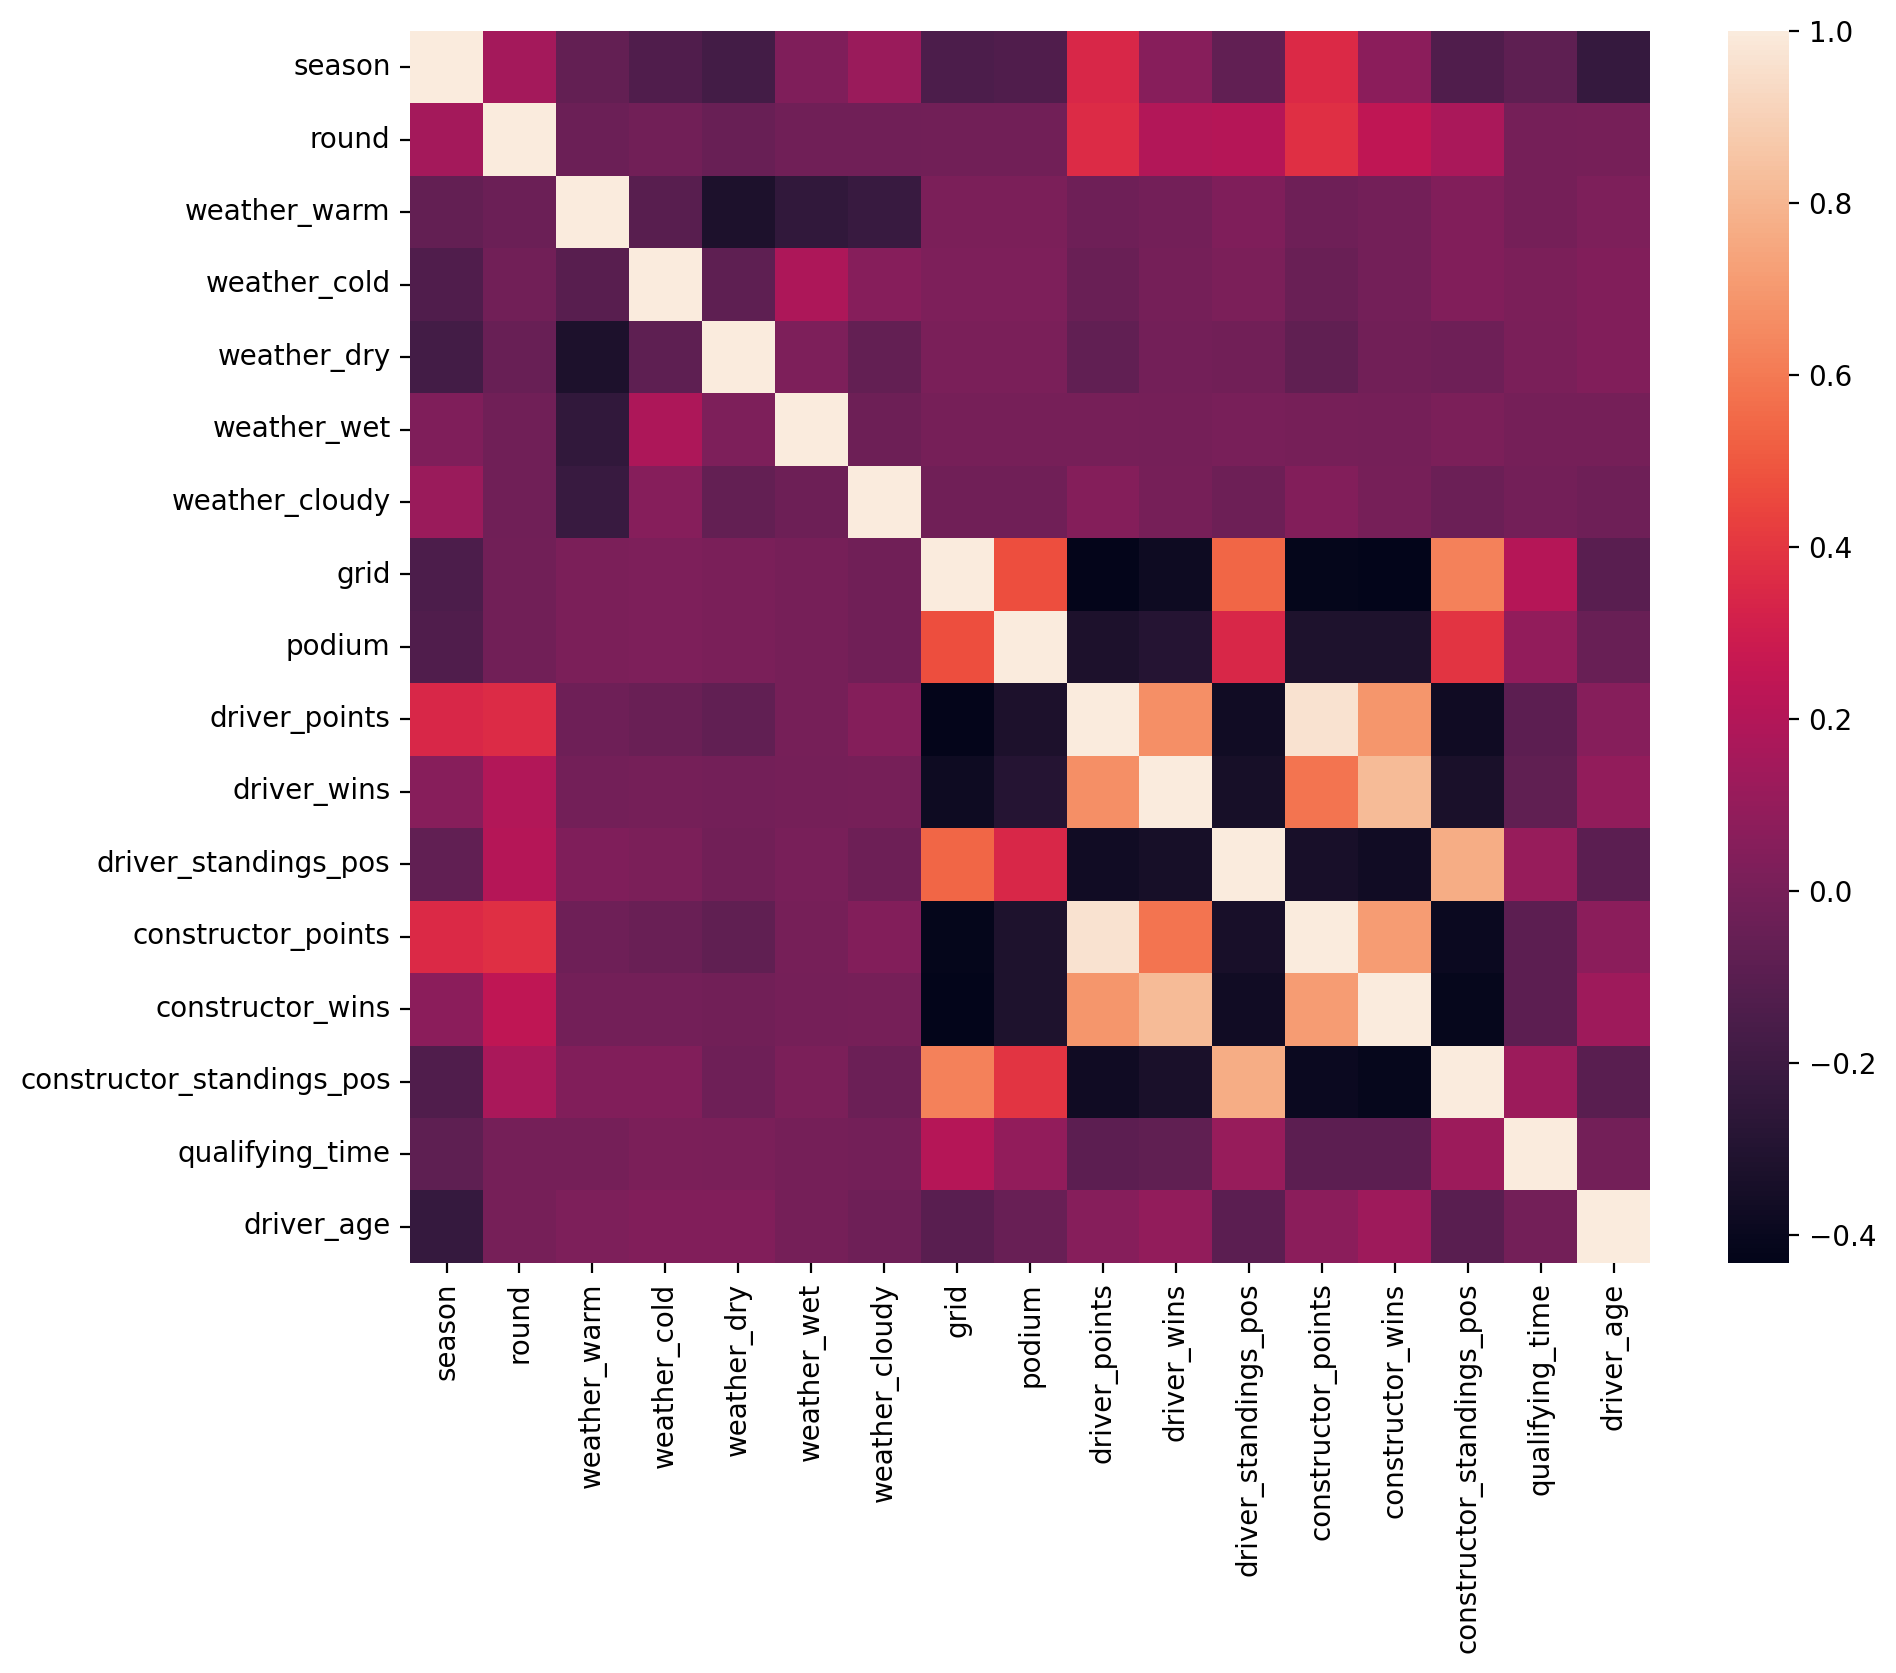

In [501]:
plt.figure(figsize=(10,8), dpi=200)
sns.heatmap(final_df.corr(numeric_only=True))

In [502]:
# get dummies

df_dum = pd.get_dummies(final_df, columns = ['circuit_id', 'nationality', 'constructor'] )

for col in df_dum.columns:
    if 'nationality' in col and df_dum[col].sum() < 140:
        df_dum.drop(col, axis = 1, inplace = True)
        
    elif 'constructor' in col and df_dum[col].sum() < 140:
        df_dum.drop(col, axis = 1, inplace = True)
        
    elif 'circuit_id' in col and df_dum[col].sum() < 70:
        df_dum.drop(col, axis = 1, inplace = True)
    
    else:
        pass

In [503]:
df_dum.shape

(14273, 100)

In [504]:
df_dum.to_csv('final_df.csv', index = False)

In [505]:
df_dum.shape

(14273, 100)